In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('laptop_price.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [3]:
data.sample(10)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
364,Asus,3.564542,16,1000,13.556426,4.685196,32221.279480
766,HP,3.451314,4,256,13.716882,2.316216,9110.314750
461,HP,2.728986,4,512,11.102899,4.965620,16752.815487
792,Asus,2.570499,16,512,15.544787,4.217274,17616.641856
745,Lenovo,1.767192,8,256,14.717696,3.590187,9384.527048
678,Acer,2.317583,8,1000,16.691018,4.047958,31832.486943
214,Lenovo,2.053024,8,512,11.671284,3.214175,16713.611746
55,Dell,3.374901,4,256,13.469933,2.739560,9081.898738
316,Lenovo,2.059544,16,1000,13.790331,3.575775,31987.433519
242,Dell,1.663391,16,1000,15.973228,2.697624,31815.640508


In [4]:
data.shape

(1000, 7)

In [5]:
data.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [7]:
data.duplicated().any() 

False

In [8]:
data.isnull().any() 

Brand               False
Processor_Speed     False
RAM_Size            False
Storage_Capacity    False
Screen_Size         False
Weight              False
Price               False
dtype: bool

In [9]:
data.nunique()

Brand                  5
Processor_Speed     1000
RAM_Size               4
Storage_Capacity       3
Screen_Size         1000
Weight              1000
Price               1000
dtype: int64

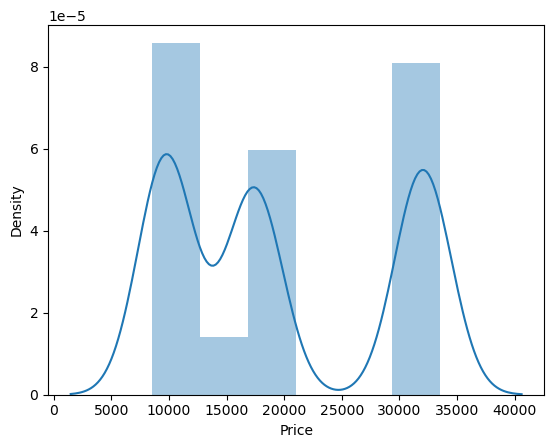

In [10]:
sns.distplot(data['Price'])
plt.show()   

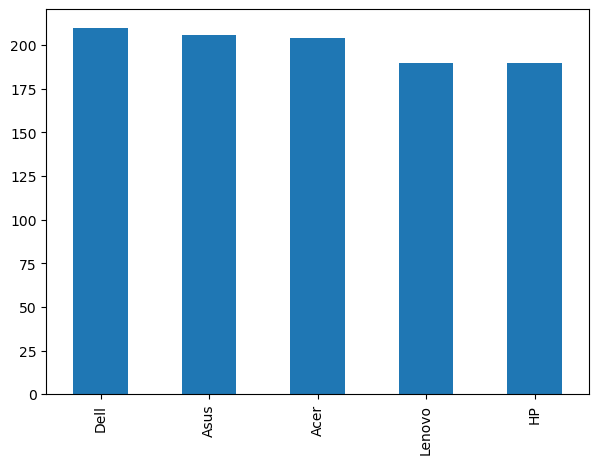

In [11]:
plt.figure(figsize=(7,5)) 
data['Brand'].value_counts().plot(kind = 'bar')
plt.show()


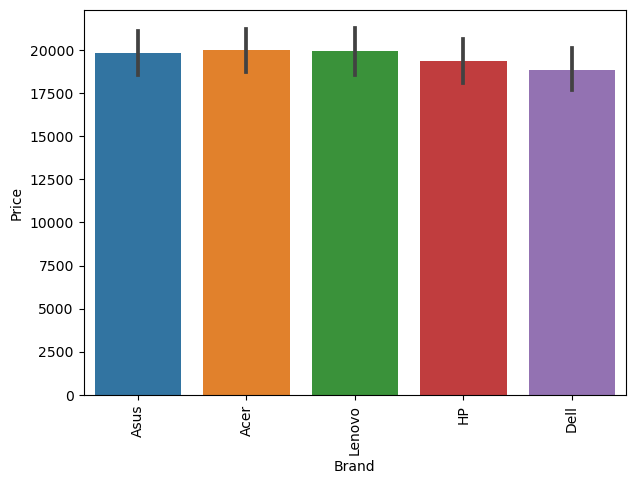

In [12]:
plt.figure(figsize=(7,5)) 
sns.barplot(x=data['Brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

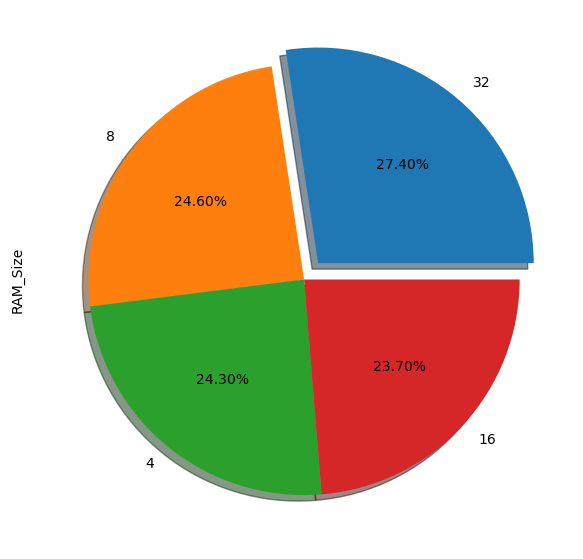

In [13]:
plt.figure(figsize=(7,7)) 
data['RAM_Size'].value_counts().plot(kind='pie' ,autopct='%1.2f%%', startangle=0 ,shadow=True , explode=(0.1,0,0,0))
plt.show()

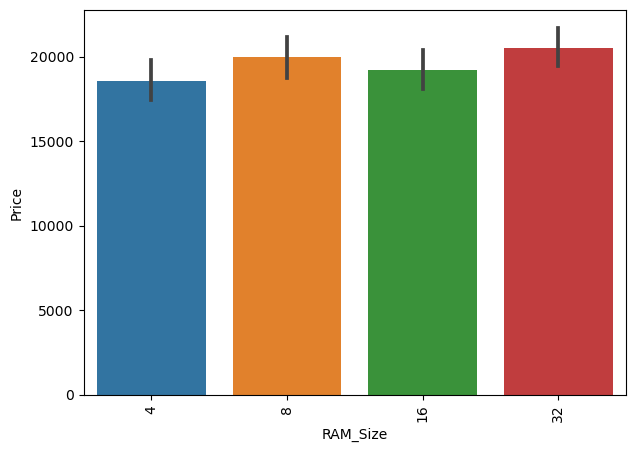

In [14]:
plt.figure(figsize=(7,5)) 
sns.barplot(x=data['RAM_Size'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

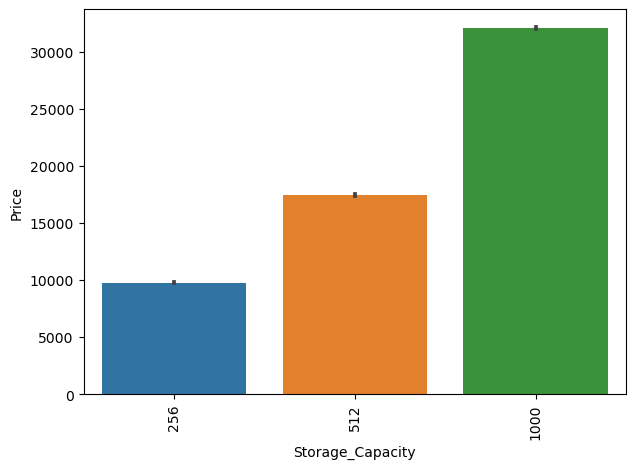

In [15]:
plt.figure(figsize=(7,5)) 
sns.barplot(x=data['Storage_Capacity'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

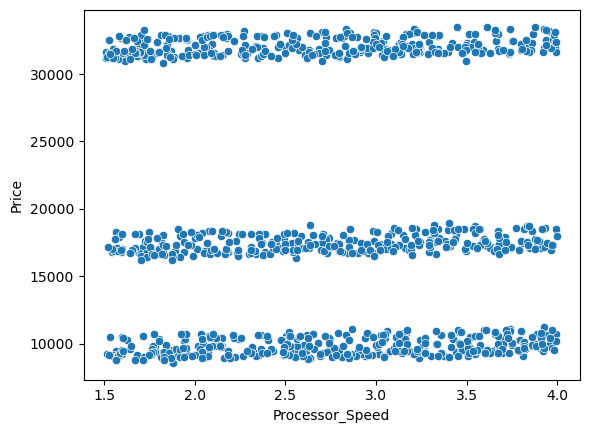

In [16]:
sns.scatterplot(x=data['Processor_Speed'],y=data['Price'])
plt.show()

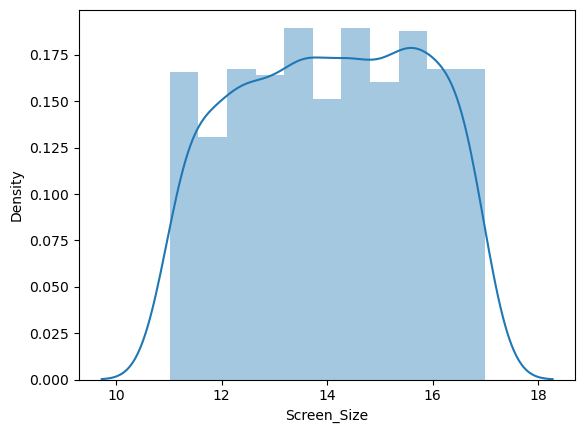

In [17]:
sns.distplot(data['Screen_Size'])
plt.show()   

In [18]:
data.corr()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Processor_Speed,1.000000,0.021391,-0.067576,-0.013425,-0.054603,-0.050737
RAM_Size,0.021391,1.000000,0.002111,-0.036002,-0.025382,0.061237
Storage_Capacity,-0.067576,0.002111,1.000000,-0.027560,0.041335,0.997908
Screen_Size,-0.013425,-0.036002,-0.027560,1.000000,0.021995,-0.026740
Weight,-0.054603,-0.025382,0.041335,0.021995,1.000000,0.038417
Price,-0.050737,0.061237,0.997908,-0.026740,0.038417,1.000000


<AxesSubplot:>

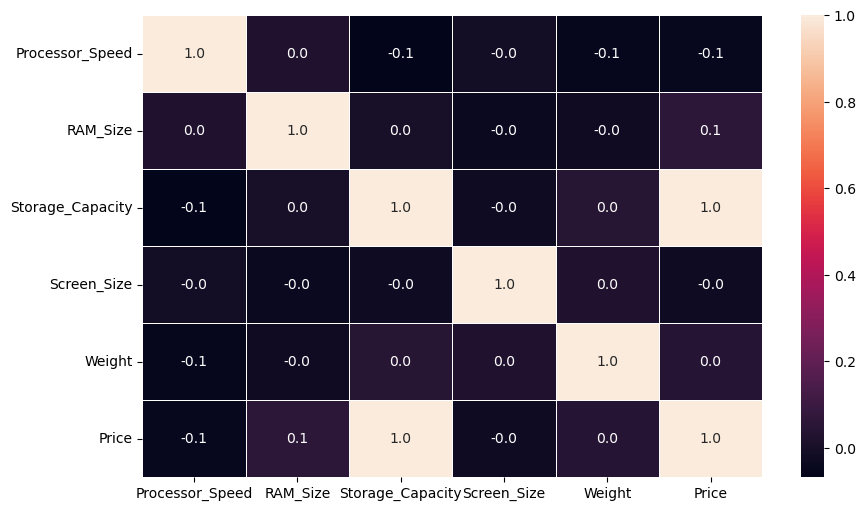

In [19]:
plt.figure(figsize=(10,6)) 
sns.heatmap(data.corr(),annot=True,fmt='0.1f',linewidth=0.5)  

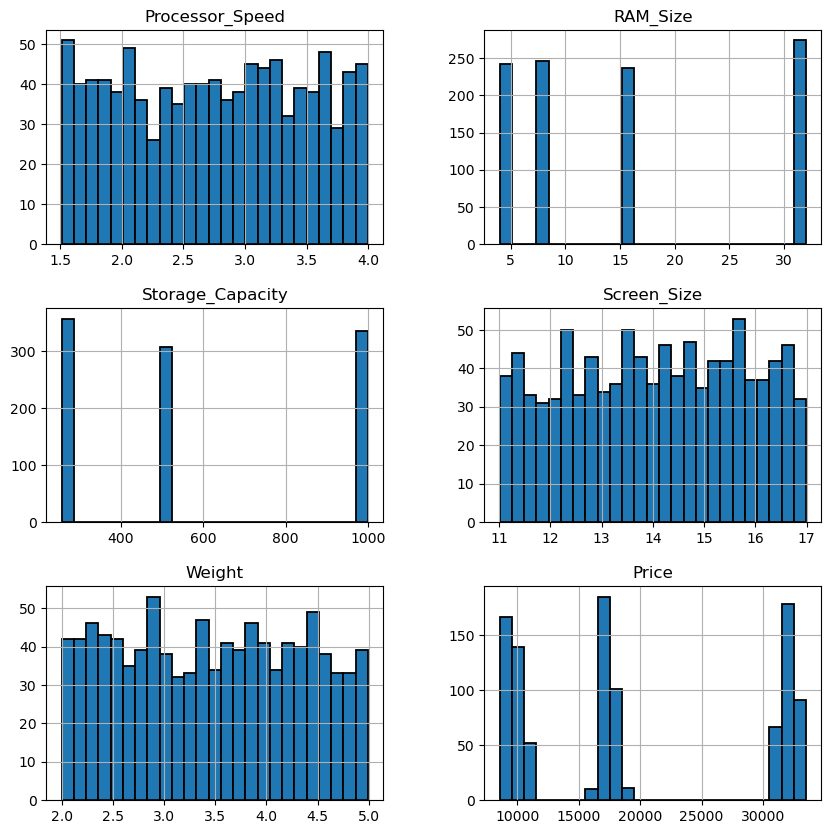

In [20]:
data.hist(bins=25, edgecolor='black', linewidth=1.3, figsize=(10,10))
plt.show()

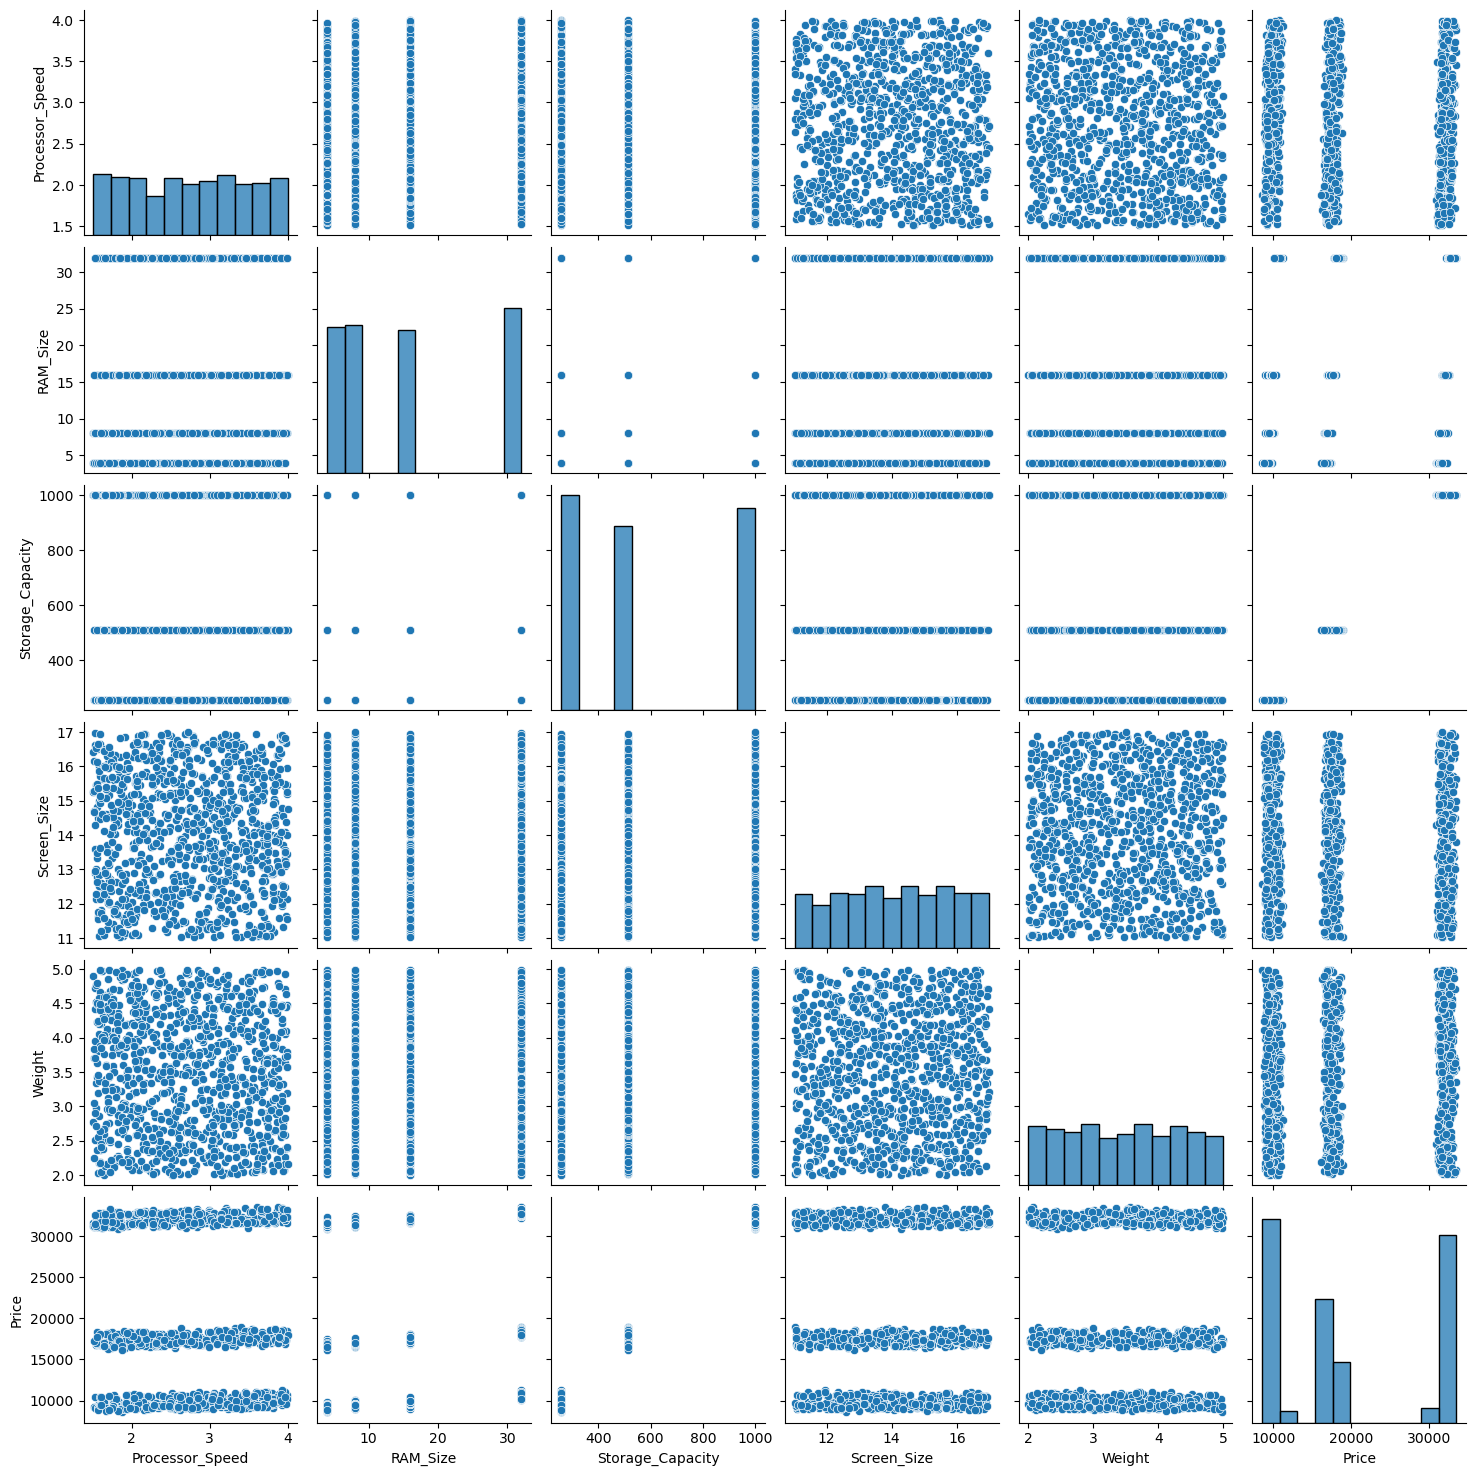

In [21]:
sns.pairplot(data)

In [22]:
data.head(5)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


## Splitting 

In [23]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Decision Tree Regression

In [26]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [27]:
y_pred=regressor.predict([[3.830296,16,512,11.185147,2.641094]])
print(y_pred)

[33005.18133838]


# Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1, random_state=0)

In [29]:
y_pred1=regressor.predict([[3.830296,16,512,11.185147,2.641094]])
print(y_pred1)

[33239.41225958]


# SVR

In [30]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [31]:
y_pred2=regressor.predict([[3.830296,16,512,11.185147,2.641094]])
print(y_pred2)

[17350.6066564]


# Multiple Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred3=regressor.predict([[3.830296,16,512,11.185147,2.641094]])
print(y_pred3)

[4839858.70663696]
